# Internship Assignment for NLP(Voice AI)                                                         
"GUVI - Student"

In [ ]:
#pip install SpeechRecognition ---> Library for performing speech recognition,with support for several engines and APIs

In [7]:
#! pip install glob2 -->  used to search for files that match a specific file pattern or name 
from glob import glob

# Get a Audio files

In [37]:
import IPython.display as ipd
import librosa.display
Audio_file=glob('*/*.wav')
Audio_file[:6]


['Audio\\common_voice_mr_27591986.wav',
 'Audio\\common_voice_mr_27591987.wav',
 'Audio\\common_voice_mr_27591988.wav',
 'Audio\\common_voice_mr_27591990.wav',
 'Audio\\common_voice_mr_27591999.wav',
 'Audio\\common_voice_mr_27592001.wav']

In [38]:
ipd.Audio(Audio_file[1])

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
y = librosa.load(Audio_file[1])


Text(0, 0.5, 'Frequency')

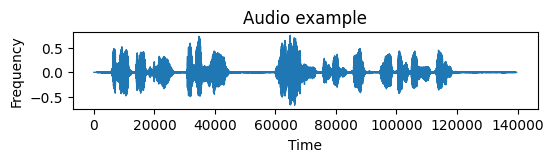

In [94]:
y = pd.to_numeric(y[0])
pd.Series(y).plot(figsize = (6,1),lw=1,title = "Audio example")
plt.xlabel('Time')
plt.ylabel('Frequency')


# Model

In [ ]:
import speech_recognition as sr

def get_transcription(audio_file_path: str):
    recognizer = sr.Recognizer() # Help us to convert the audio data into text files
    with sr.AudioFile(audio_file_path) as audio_file:
        recognizer.adjust_for_ambient_noise(audio_file)
        audio = recognizer.record(audio_file)

        try:

            text = recognizer.recognize_google(audio, language="mr-IN") # access the Google web speech API and turn spoken language into text
            return text
        except sr.UnknownValueError:
            print("could not understand audio") # Given audio is not marathi or not understanding it executed
        except sr.RequestError as e:
            print("Could not request results; {e}")

    return None

for i in range (0,len(Audio_file)):
    audio_file_path = Audio_file[i] 
    result = get_transcription(audio_file_path)  # Call function
    
    if result:
        file_name= Audio_file[i].replace('Audio\\', '')  # Remove the string Audio\\
        with open('out.txt', 'a',encoding="utf-8") as f:  # stored all transcription values in "out text file"
            f.write(file_name +"    "+ result+"\n")
            

could not understand audio
could not understand audio
could not understand audio
could not understand audio
could not understand audio
could not understand audio
could not understand audio
could not understand audio


In [12]:
import os
#os.remove("out.txt") --> Its remove the out text file 

# WER Test and Evaluation

In [13]:
f = open("out.txt",encoding="utf8")
out_text=f.read()    # Read out text file
f = open("trans.txt",encoding="utf8")
trans_text=f.read()  # Read Given trans text file


In [2]:
import re
from jiwer import wer
a=[]
b=[]
pattern1='\d.wav....(.*)'
pattern2='(common.*.wav)'
match1 = re.findall(pattern1,out_text)
match2 = re.findall(pattern2,out_text)
a.append(match1)
b.append(match2)
b[0][0]

'common_voice_mr_27591986.wav'

In [3]:
a_t=[]
b_t=[]
pattern1='\d.wav....(.*)'
pattern2='(common.*.wav)'
match1 = re.findall(pattern1,trans_text)
match2 = re.findall(pattern2,trans_text)
a_t.append(match1)
b_t.append(match2)
b_t[0][0]

'common_voice_mr_32645351.wav'

In [4]:
print(a_t[0][1807])
print(a[0][8])

ानंतर जयललितांनी मुख्यमंत्रिपदाचा राजीनामा दिला
त्यानंतर जाय ललिताने मुख्यमंत्री पदाचा राजीनामा दिला


In [5]:
def Wer_value(i,j):
     if __name__ == "__main__":
            reference = a_t[0][j]
            hypothesis = a[0][i]
            return wer(reference, hypothesis)
            
results = []
for i in range(0,1808):
    for j in range(0,1808):
        if b[0][i] != b_t[0][j]:
            continue
        else:
            results.append(Wer_value(i,j))
    

In [6]:
import statistics

total_avg = statistics.mean(results)
print("The average WER is ", round(total_avg ,2))

The average WER is  0.33


# 67 percentage this model transcription is accurate"

" 0.0 means its perfect match "

" 0.5 means pertially match "

" 1.0 means No match "